In [5]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from src.loading import *
from src.saving import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# gSAM

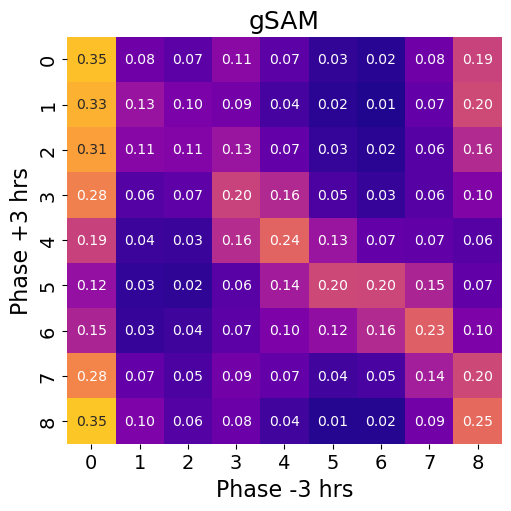

In [23]:
# Load PCs and normalize them by std dev
#
pcs = load_gsam_eofs_pcs().scores()
pcs = pcs/pcs.std(('lat', 'lon', 'time'))
# Compute phase angle, phase number, and radius
# Where radius < 0.5, we set phase number to 0
#
theta = np.arctan2(pcs.sel(mode=2), pcs.sel(mode=1))
radius = np.sqrt(pcs.sel(mode=2)**2 + pcs.sel(mode=1)**2)
phase_num = theta.copy(data=np.floor(np.mod((np.array(theta)+(np.pi/8))/(np.pi/4) + 4, 8))+1)
phase_num = phase_num.where(radius >= 0.5, other=0, drop=False)
# Compute what fraction of grids at time-3  proceed to what phase at time+3
#
initial_phases = phase_num.isel(time=slice(0, -2)).data
final_phases = phase_num.isel(time=slice(2, None)).data

transition_matrix = np.full(shape=(9, 9), fill_value=np.nan)

for ip in range(0, 9):
    initial_grids = (initial_phases==ip)
    for fp in range(0, 9):
        final_grids = (final_phases==fp)
        trans_grids = initial_grids & final_grids
        transition_matrix[ip, fp] = trans_grids.ravel().sum()
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

# Make figure
#
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)
sns.heatmap(
    transition_matrix,
    ax=ax,
    annot=True,
    fmt=".2f",
    cmap="plasma",
    cbar=False,
    norm=colors.Normalize(vmin=0, vmax=.40)
)
# Increase tick label sizes
ax.tick_params(axis='both', which='major', labelsize=14)

# Increase axis label sizes
ax.set_xlabel('Phase -3 hrs', fontsize=16)
ax.set_ylabel('Phase +3 hrs', fontsize=16)

# Increase title size
ax.set_title('gSAM', fontsize=18)

# Save figure
#
save_figure(fig, 'gsam_transition_matrix.pdf')

# ERA5

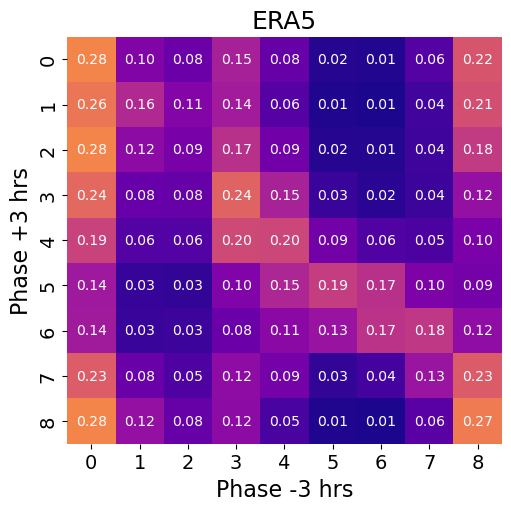

In [25]:
# Load PCs and normalize them by std dev
#
pcs = load_era5_eofs_pcs().scores()
pcs = pcs/pcs.std(('latitude', 'longitude', 'time'))
# Compute phase angle, phase number, and radius
# Where radius < 0.5, we set phase number to 0
#
theta = np.arctan2(pcs.sel(mode=2), pcs.sel(mode=1))
radius = np.sqrt(pcs.sel(mode=2)**2 + pcs.sel(mode=1)**2)
phase_num = theta.copy(data=np.floor(np.mod((np.array(theta)+(np.pi/8))/(np.pi/4) + 4, 8))+1)
phase_num = phase_num.where(radius >= 0.5, other=0, drop=False)

# Compute what fraction of grids at time-3  proceed to what phase at time+3
#
initial_phases = phase_num.isel(time=slice(0, -2)).data
final_phases = phase_num.isel(time=slice(2, None)).data

transition_matrix = np.full(shape=(9, 9), fill_value=np.nan)

for ip in range(0, 9):
    initial_grids = (initial_phases==ip)
    for fp in range(0, 9):
        final_grids = (final_phases==fp)
        trans_grids = initial_grids & final_grids
        transition_matrix[ip, fp] = trans_grids.ravel().sum()
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

# Make figure
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)
sns.heatmap(
    transition_matrix,
    ax=ax,
    annot=True,
    fmt=".2f",
    cmap="plasma",
    cbar=False,
    norm=colors.Normalize(vmin=0, vmax=.40)
)
# Increase tick label sizes
ax.tick_params(axis='both', which='major', labelsize=14)

# Increase axis label sizes
ax.set_xlabel('Phase -3 hrs', fontsize=16)
ax.set_ylabel('Phase +3 hrs', fontsize=16)

# Increase title size
ax.set_title('ERA5', fontsize=18)

# Save figure
#
save_figure(fig, 'era5_transition_matrix.pdf')